## Importing Neccessary Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

## Understanding The Data

In [4]:
df= pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.shape

(13580, 21)

In [6]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [8]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [9]:
df.describe(include=['object'])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


## Data PreparationWant to work with some specific columns

In [11]:
df.drop(["Suburb",'Address','SellerG', 'Date','CouncilArea','Regionname'],axis="columns",inplace=True)
df.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


## Data Cleaning

In [13]:
df.isnull().sum()

Rooms               0
Type                0
Price               0
Method              0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [14]:
df.drop(["BuildingArea",'YearBuilt',],axis="columns",inplace=True)
df.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0
1,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0
2,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0
3,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0
4,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0


## Detecting and Removing of outliers
Outliers can only be found in numeric columns

In [16]:
# Function to check hor outliers in numeric columns by drawing box plot for each
def plot_outliers_boxplot(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_cols = len(numeric_cols)

    plt.figure(figsize=(15, 5 * (num_cols // 3 + 1)))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot((num_cols // 3 + 1), 3, i)
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')

    plt.tight_layout()
    plt.show()

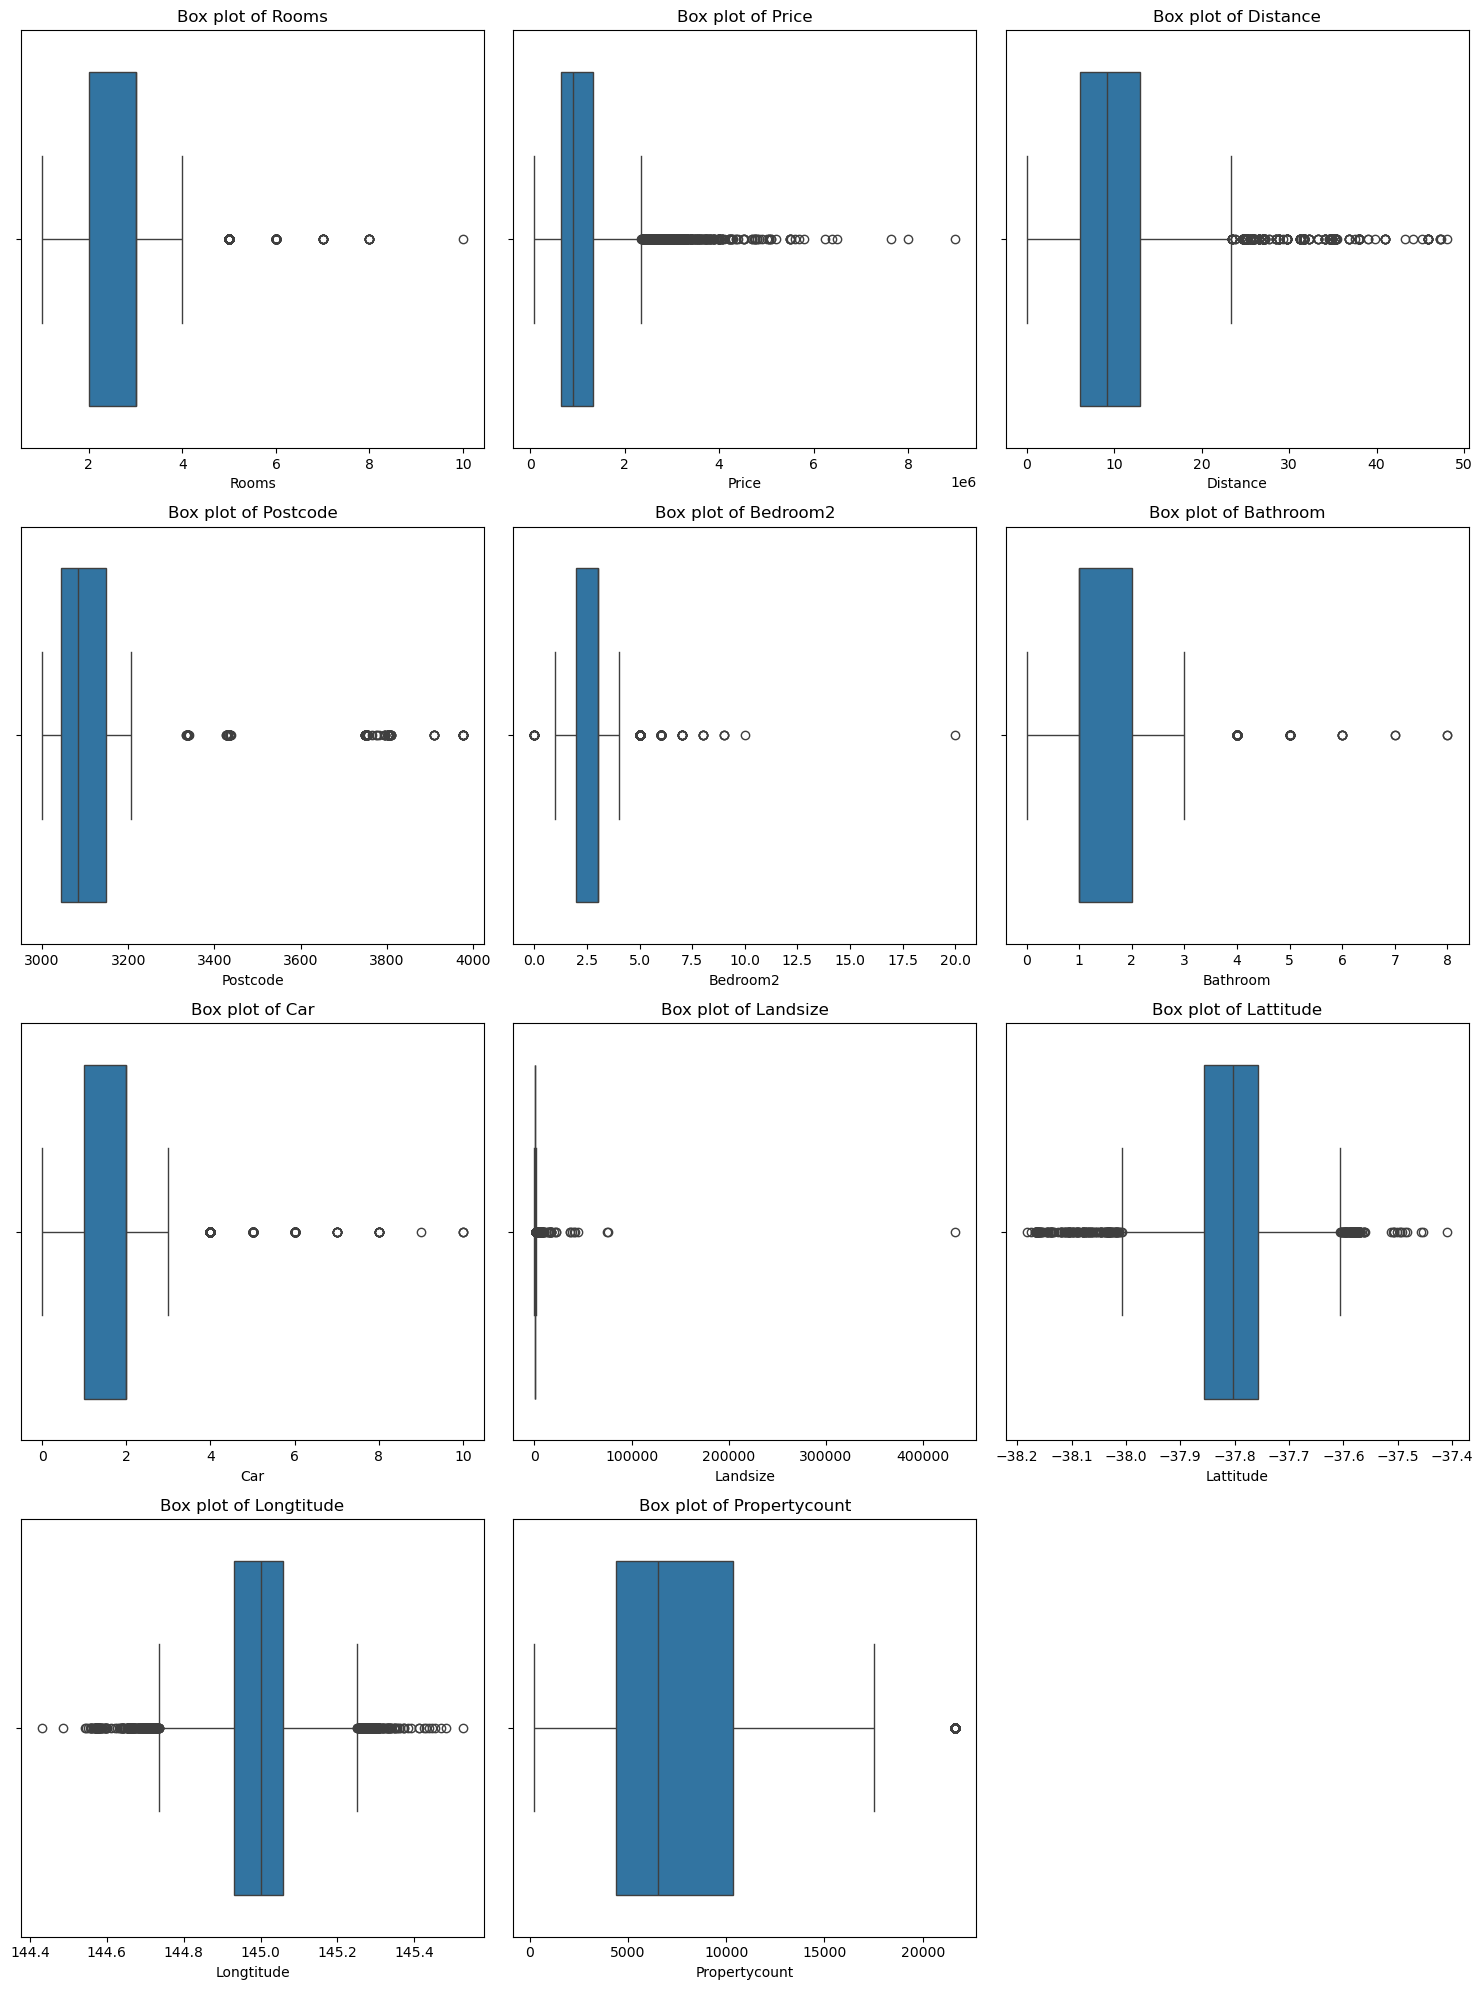

In [17]:
plot_outliers_boxplot(df)

In [18]:
# Functions to remove outliers in individual columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[((df[column] >= lower_bound) & (df[column] <= upper_bound))]

In [19]:
df = remove_outliers(df, "Price")
df = remove_outliers(df, "Rooms")
df = remove_outliers(df, "Distance")
df = remove_outliers(df, "Postcode")
df = remove_outliers(df, "Bedroom2")
df = remove_outliers(df, "Bathroom")
df = remove_outliers(df, "Car")
df = remove_outliers(df, "Landsize")
df = remove_outliers(df, "Lattitude")
df = remove_outliers(df, "Longtitude")
df = remove_outliers(df, "Propertycount")
df.shape

(10601, 13)

Visualization after removing the outliers

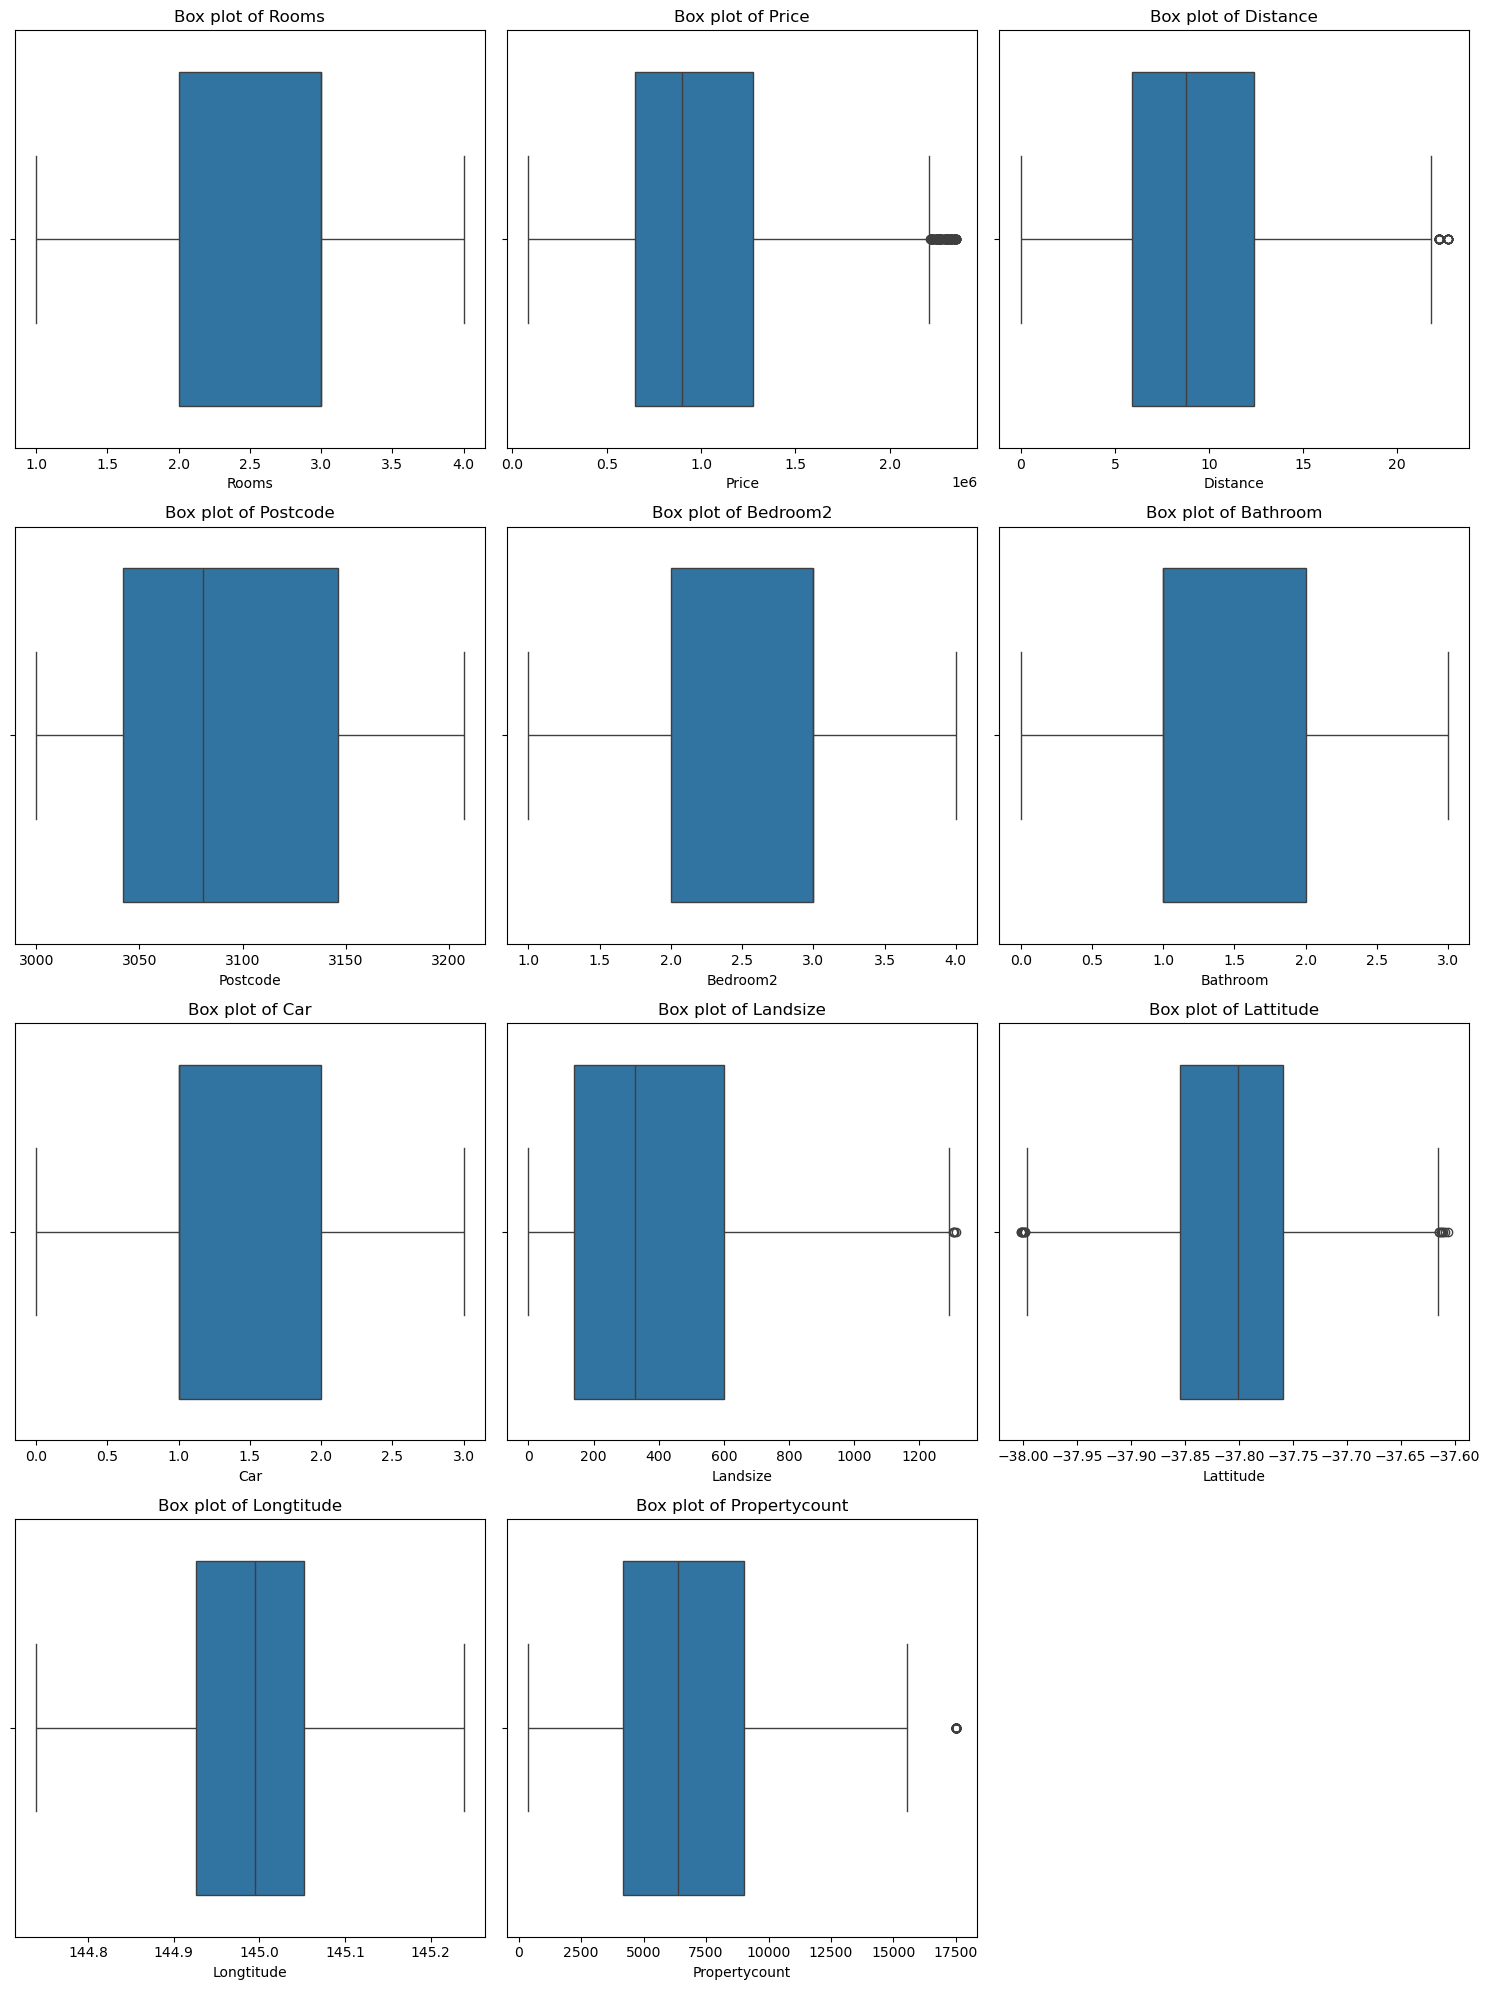

In [21]:
plot_outliers_boxplot(df)

## Dividing the dataset in features(independent variable) and target variable(dependent variable)

In [23]:
y = df['Price']
x = df.drop(columns=['Price'])

In [24]:
y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [25]:
x.head()

,Rooms,Type,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,2,h,S,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0
1,2,h,S,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0
2,3,h,SP,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0
3,3,h,PI,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0
4,4,h,VB,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0


## Dividing data in training and testing dataset

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=10)

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
my_imputer = SimpleImputer()

## Imputation of null values

In [32]:
imputed_x_train_Car = my_imputer.fit_transform(x_train[['Car']])
imputed_x_test_Car = my_imputer.transform(x_test[['Car']])


In [33]:
x_train['Car'] = imputed_x_train_Car
x_test['Car'] = imputed_x_test_Car

In [34]:
x_train.isna().sum()

Rooms            0
Type             0
Method           0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

## Using Pandas Get Dummies to encode categorical columns

In [36]:
x_train['Type'].unique()

array(['u', 'h', 't'], dtype=object)

In [37]:
x_test['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [38]:
# One-hot encode training data
x_train_dummies=pd.get_dummies(x_train, columns=['Type','Method'],drop_first=True)
# One-hot encode training data
x_test_dummies=pd.get_dummies(x_test, columns=['Type','Method'],drop_first=True)

## Scaling Of Numeric Columns

In [40]:
from sklearn.preprocessing import StandardScaler


# Select only numeric columns
numeric_cols = x_train_dummies.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit on train, transform both
x_train_dummies[numeric_cols] = scaler.fit_transform(x_train_dummies[numeric_cols])
x_test_dummies[numeric_cols] = scaler.transform(x_test_dummies[numeric_cols])

## Linear Regression Model Fitting

In [42]:
reg=linear_model.LinearRegression()

In [43]:
reg.fit(x_train_dummies,y_train)

LinearRegression()

## Model testing

In [45]:
reg.score(x_test_dummies,y_test)

0.6501140407035652

## Linear Regression Model Fitting

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor( random_state = 10)

In [48]:
rf_model.fit(x_train_dummies,y_train)

RandomForestRegressor(random_state=10)

## Model testing

In [50]:
rf_model.score(x_test_dummies,y_test)

0.8242592079952681